# Лабораторная работа №1. Предварительная обработка данных

### Работу выполнил студен: Туров Виталий Александрович
### Работу проверил: Гай В. Е.
### Группа: 16-В-1
### Вариант: №6

#### * Текст задания: *
<center>** Индекс счастья **</center>
1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.

2. Постройте график счастья по регионам, страны на графике должны представляться отдельными точками.

3. Оцените количество счастья по годам по регионам.

4. Определите наиболее сильно изменяющиеся параметры по разным странам в разные годы.

5. Определите страны, появляющиеся и исчезающие в рейтинге стран.

6. Удалите строки с пропущенными значениями. Выведите размер набора данных до и после удаления.

7. Вычислите корреляцию Пирсона и Спирмена между признаками * Trust.Government.Corruption * и * Family *. Сравните полученные величины корреляции. Постройте гистограммы для указаных признаков. Оцените значение ** p-value ** .

8. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [1]:
# Подключаем пакеты Pandas
import pandas as pd
import numpy as np
from  scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
# Загружаем необходимые данные за 2015 год, 2016 год, 2017 год
df2015 = pd.read_csv("2015.csv")
df2016 = pd.read_csv("2016.csv")
df2017 = pd.read_csv("2017.csv")

In [3]:
# Смотрим данные за 2015 год
df2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [4]:
# Смотрим данные за 2016 год
df2016.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [5]:
# Смотрим данные за 2017 год
df2017.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


In [6]:
#Список признаков составляющие индекс счастья
listIndication = ["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity", "Dystopia Residual"]

In [7]:
print(df2015.columns, df2016.columns, df2017.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


> В третьей таблице имена столбцов отличаются от имен первых двух. Вместо пробелов точки. Поэтому, перед объединение таблиц нужно изменить названия столбцов 3 таблицы.

In [8]:
#  Изменение названия столбцов
df2017.rename(columns = {"Happiness.Rank" : "Happiness Rank", "Happiness.Score" : "Happiness Score", "Whisker.high" : "Whisker high", "Whisker.low" : "Whisker low", "Economy..GDP.per.Capita." : "Economy (GDP per Capita)", "Trust..Government.Corruption." : "Trust (Government Corruption)", "Dystopia.Residual" : "Dystopia Residual", "Health..Life.Expectancy." : "Health (Life Expectancy)"}, inplace=True)

In [9]:
#  Объединение трех таблиц
dfAll=pd.concat([pd.concat([df2015, df2016]), df2017])
dfAll.shape

/Users/walleri1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


(470, 16)

###  *Визуализируйте корреляции между признаками, находящимися в наборе данных. Сделайте выводы*

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Lower Confidence Interval,Standard Error,Trust (Government Corruption),Upper Confidence Interval,Whisker high,Whisker low
Dystopia Residual,1.000000,0.030087,-0.081537,0.038422,-0.114468,-0.482706,0.489747,0.057674,0.538793,0.083981,0.000001,0.548164,0.478824,0.471505
Economy (GDP per Capita),0.030087,1.000000,0.585449,0.344962,-0.014173,-0.790551,0.785450,0.792224,0.790673,-0.217651,0.301935,0.789140,0.811868,0.812267
Family,-0.081537,0.585449,1.000000,0.425377,0.071775,-0.637627,0.636532,0.486383,0.741523,-0.120728,0.158605,0.736184,0.750934,0.753767
Freedom,0.038422,0.344962,0.425377,1.000000,0.343389,-0.547627,0.560353,0.359566,0.566857,-0.129773,0.490405,0.566203,0.569907,0.569808
Generosity,-0.114468,-0.014173,0.071775,0.343389,1.000000,-0.146162,0.163562,0.077326,0.158025,-0.088439,0.287414,0.155495,0.155462,0.154904
Happiness Rank,-0.482706,-0.790551,-0.637627,-0.547627,-0.146162,1.000000,-0.993268,-0.750146,-0.994928,0.158516,-0.384371,-0.995525,-0.993058,-0.991533
Happiness Score,0.489747,0.785450,0.636532,0.560353,0.163562,-0.993268,1.000000,0.748040,0.999485,-0.177254,0.406340,0.999474,0.999497,0.999520
Health (Life Expectancy),0.057674,0.792224,0.486383,0.359566,0.077326,-0.750146,0.748040,1.000000,0.769177,-0.310287,0.262932,0.760752,0.776634,0.786385
Lower Confidence Interval,0.538793,0.790673,0.741523,0.566857,0.158025,-0.994928,0.999485,0.769177,1.000000,NaN,0.404840,0.997919,NaN,NaN
Standard Error,0.083981,-0.217651,-0.120728,-0.129773,-0.088439,0.158516,-0.177254,-0.310287,NaN,1.000000,-0.178325,NaN,NaN,NaN


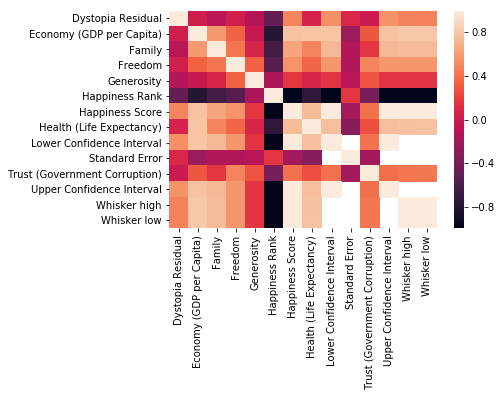

In [10]:
dfCorr = dfAll.corr()
sns.heatmap(dfCorr)
dfCorr

> ***Вывод***
По отображенной корреляции видно, что признак *"Happiness Rank"* имеет высокую степень корреляции с остальными признаками.

### *Постройте график счастья по регионам, страны на графике должны представляться отдельными точками*

In [11]:
#  Группировка стран по регионам
dfCountry = dfAll.groupby("Region").head()

[Text(0,0.5,'Happiness Score'), Text(0.5,0,'Region')]

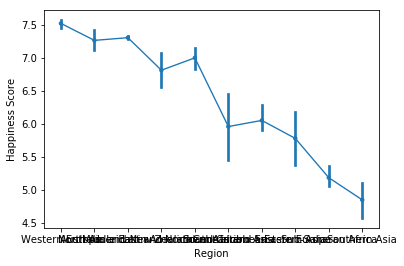

In [12]:
dot_size = 0.5
ax = sns.pointplot(x=dfCountry.Region, y=dfCountry["Happiness Score"], scale = dot_size)
ax.set(xlabel='Region', ylabel='Happiness Score')

### *Оцените количество счастья по годам по регионам*

[Text(0,0.5,'Happiness Score'), Text(0.5,0,'Region')]

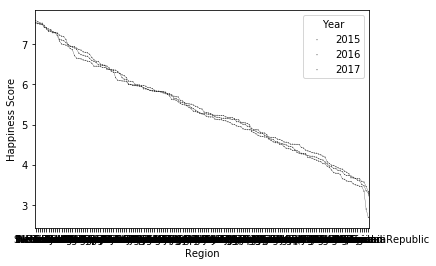

In [13]:
df2015["Year"] = "2015"
df2016["Year"] = "2016"
df2017["Year"] = "2017"
ax = sns.pointplot(x="Country", y="Happiness Score", scale = 0.1, data=df2015, color="#90EE90", hue = "Year")
ax = sns.pointplot(x="Country", y="Happiness Score", scale = 0.1, data=df2016, color="#E1523D", hue = "Year")
ax = sns.pointplot(x="Country", y="Happiness Score", scale = 0.1, data=df2017, color="#BA55D3", hue = "Year")
ax.set(xlabel='Region', ylabel='Happiness Score')

### *Определите наиболее сильно изменяющиеся параметры по разным странам в разные годы*

In [14]:
df2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [15]:
def shift(name, data2015, data2016, data2017):
    """Функция определяет изменение признака name по годам.
    Возвращает список из 3 значений - изменения признака name за 2015, 2016, 2017"""
    tmpMin2015 = data2015.describe().loc[["min"], name].value_counts().index[0]  #  Минимальное значение по признаку за 2015 год
    tmpMax2015 = data2015.describe().loc[["max"], name].value_counts().index[0]  #  Максимальное значение по признаку за 2015 год
    tmpShift2015 = tmpMax2015 - tmpMin2015  #  Изменение признака за 2015 год
    print(f"Изменение \"{name}\" за 2015 год: {tmpShift2015}")
    tmpMin2016 = data2016.describe().loc[["min"], name].value_counts().index[0]  #  Минимальное значение по признаку за 2016 год
    tmpMax2016 = data2016.describe().loc[["max"], name].value_counts().index[0]  #  Максимальное значение по признаку за 2016 год
    tmpShift2016 = tmpMax2016 - tmpMin2016  #  Изменение признака за 2016 год
    print(f"Изменение \"{name}\" за 2016 год: {tmpShift2016}")
    tmpMin2017 = data2017.describe().loc[["min"], name].value_counts().index[0]  #  Минимальное значение по признаку за 2017 год
    tmpMax2017 = data2017.describe().loc[["max"], name].value_counts().index[0]  #  Максимальное значение по признаку за 2017 год
    tmpShift2017 = tmpMax2017 - tmpMin2017  #  Изменение признака за 2017 год
    print(f"Изменение \"{name}\" за 2017 год: {tmpShift2017}")
    return [tmpShift2015, tmpShift2016, tmpShift2017]

In [16]:
HappinessRankShift = shift("Happiness Rank", df2015, df2016, df2017)

Изменение "Happiness Rank" за 2015 год: 157.0
Изменение "Happiness Rank" за 2016 год: 156.0
Изменение "Happiness Rank" за 2017 год: 154.0


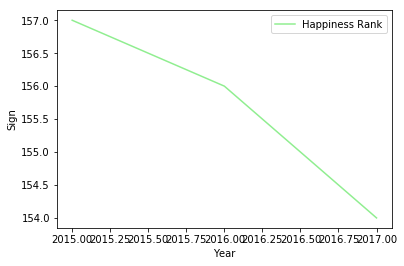

In [17]:
year = np.array([2015, 2016, 2017])
fig, ax = plt.subplots()
ax.plot(year, HappinessRankShift, color="#90EE90", label="Happiness Rank")
ax.set_xlabel("Year")
ax.set_ylabel("Sign")
ax.legend()
plt.show()

Изменение "Happiness Score" за 2015 год: 4.748000000000001
Изменение "Happiness Score" за 2016 год: 4.621
Изменение "Happiness Score" за 2017 год: 4.844000101089479


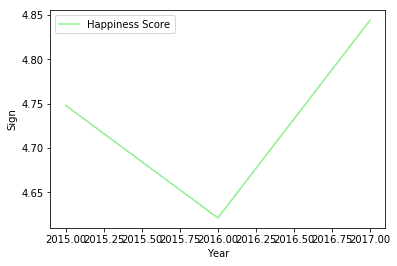

In [18]:
HappinessScoreShift = shift("Happiness Score", df2015, df2016, df2017)
fig, ax = plt.subplots()
ax.plot(year, HappinessScoreShift, color="#90EE90", label="Happiness Score")
ax.set_xlabel("Year")
ax.set_ylabel("Sign")
ax.legend()
plt.show()

Изменение "Family" за 2015 год: 1.4022299999999999
Изменение "Family" за 2016 год: 1.18326
Изменение "Family" за 2017 год: 1.6105740070343


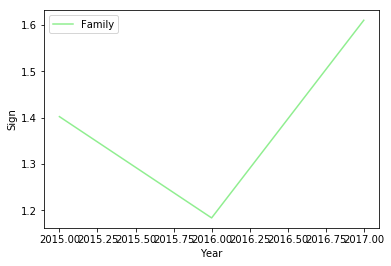

In [19]:
FamilyShift = shift("Family", df2015, df2016, df2017)
fig, ax = plt.subplots()
ax.plot(year, FamilyShift, color="#90EE90", label="Family")
ax.set_xlabel("Year")
ax.set_ylabel("Sign")
ax.legend()
plt.show()

Изменение "Economy (GDP per Capita)" за 2015 год: 1.69042
Изменение "Economy (GDP per Capita)" за 2016 год: 1.82427
Изменение "Economy (GDP per Capita)" за 2017 год: 1.8707656860351598


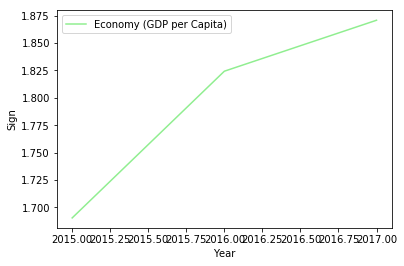

In [20]:
EconomyShift = shift("Economy (GDP per Capita)", df2015, df2016, df2017)
fig, ax = plt.subplots()
ax.plot(year, EconomyShift, color="#90EE90", label="Economy (GDP per Capita)")
ax.set_xlabel("Year")
ax.set_ylabel("Sign")
ax.legend()
plt.show()

Изменение "Health (Life Expectancy)" за 2015 год: 1.02525
Изменение "Health (Life Expectancy)" за 2016 год: 0.9527700000000001
Изменение "Health (Life Expectancy)" за 2017 год: 0.9494923949241642


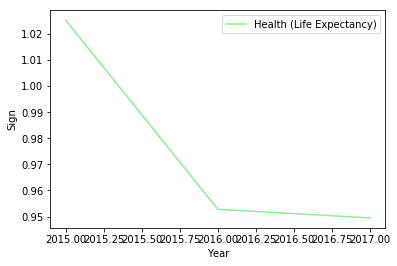

In [21]:
HealthShift = shift("Health (Life Expectancy)", df2015, df2016, df2017)
fig, ax = plt.subplots()
ax.plot(year, HealthShift, color="#90EE90", label="Health (Life Expectancy)")
ax.set_xlabel("Year")
ax.set_ylabel("Sign")
ax.legend()
plt.show()

Изменение "Freedom" за 2015 год: 0.66973
Изменение "Freedom" за 2016 год: 0.60848
Изменение "Freedom" за 2017 год: 0.6582486629486078


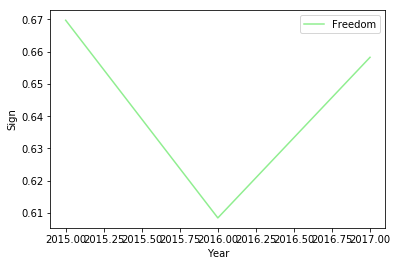

In [22]:
FreedomShift = shift("Freedom", df2015, df2016, df2017)
fig, ax = plt.subplots()
ax.plot(year, FreedomShift, color="#90EE90", label="Freedom")
ax.set_xlabel("Year")
ax.set_ylabel("Sign")
ax.legend()
plt.show()

Изменение "Generosity" за 2015 год: 0.79588
Изменение "Generosity" за 2016 год: 0.81971
Изменение "Generosity" за 2017 год: 0.8380751609802249


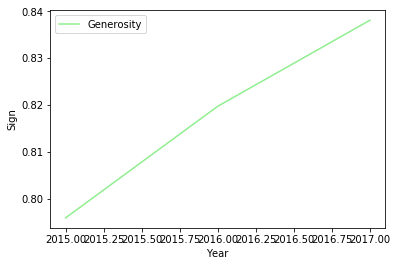

In [23]:
GenerosityShift = shift("Generosity", df2015, df2016, df2017)
fig, ax = plt.subplots()
ax.plot(year, GenerosityShift, color="#90EE90", label="Generosity")
ax.set_xlabel("Year")
ax.set_ylabel("Sign")
ax.legend()
plt.show()

### Определите страны, появляющиеся и исчезающие в рейтинге стран

In [24]:
dfCountry = dfAll.groupby("Country").Country.count()
dfCountry[dfCountry<3]  #  Страны, появляющиеся и исчезающие из рейтинга стран

Country
Belize                      2
Central African Republic    2
Comoros                     2
Djibouti                    1
Hong Kong                   2
Hong Kong S.A.R., China     1
Laos                        2
Lesotho                     2
Mozambique                  2
Namibia                     2
Oman                        1
Puerto Rico                 1
Somalia                     2
Somaliland Region           1
Somaliland region           1
South Sudan                 2
Suriname                    2
Swaziland                   1
Taiwan                      2
Taiwan Province of China    1
Name: Country, dtype: int64

In [25]:
#  Выделим страны из статистики от каждого года
Countrys2015 = df2015.Country
Countrys2016 = df2016.Country
Countrys2017 = df2017.Country
print(len(Countrys2015), len(Countrys2016), len(Countrys2017))

158 157 155


In [26]:
def shiftCountry(data1, data2, data3):
    """Сравнивает наличие/отсутсвие стран за два года"""
    for Country in data1:
        if Country not in data2:
            print(f"Страна {Country} исчезла из статистики")

In [27]:
shiftCountry(Countrys2015, Countrys2016, Countrys2017)

Страна Switzerland исчезла из статистики
Страна Iceland исчезла из статистики
Страна Denmark исчезла из статистики
Страна Norway исчезла из статистики
Страна Canada исчезла из статистики
Страна Finland исчезла из статистики
Страна Netherlands исчезла из статистики
Страна Sweden исчезла из статистики
Страна New Zealand исчезла из статистики
Страна Australia исчезла из статистики
Страна Israel исчезла из статистики
Страна Costa Rica исчезла из статистики
Страна Austria исчезла из статистики
Страна Mexico исчезла из статистики
Страна United States исчезла из статистики
Страна Brazil исчезла из статистики
Страна Luxembourg исчезла из статистики
Страна Ireland исчезла из статистики
Страна Belgium исчезла из статистики
Страна United Arab Emirates исчезла из статистики
Страна United Kingdom исчезла из статистики
Страна Oman исчезла из статистики
Страна Venezuela исчезла из статистики
Страна Singapore исчезла из статистики
Страна Panama исчезла из статистики
Страна Germany исчезла из статистик

### Удалите строки с пропущенными значениями. Выведите размер набора данных до и после удаления

In [28]:
dfAll.shape  #  Размер набора данных до удаления пропущенных значений

(470, 16)

In [29]:
df=dfAll[~(dfAll==0).any(axis=1)]  #  Удаление нулевых значений
df.shape

(453, 16)

### Вычислите корреляцию Пирсона и Спирмена между признаками Trust.Government.Corruption и Family . Сравните полученные величины корреляции. Постройте гистограммы для указаных признаков. Оцените значение p-value

In [30]:
pearsonr(df["Trust (Government Corruption)"],df["Family"]) #кореляция Пирсона

(0.16219813235614539, 0.0005289920325555535)

In [31]:
spearmanr(df["Trust (Government Corruption)"],df["Family"]) #кореляция Спирмена

SpearmanrResult(correlation=0.1007583131777208, pvalue=0.03202861490820036)

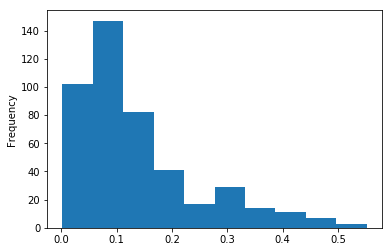

In [32]:
s = pd.Series(df["Trust (Government Corruption)"])
s.plot.hist()

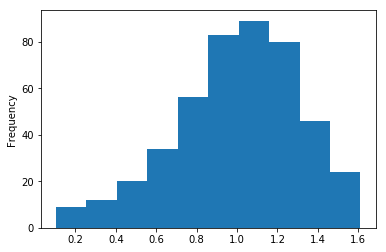

In [33]:
s = pd.Series(df["Family"])
s.plot.hist()

### Добавьте в набор данных признак, являющийся суммой двух других признаков

In [34]:
df["Sum"]=df["Happiness Score"] + df["Generosity"]

/Users/walleri1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
df.head()

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Upper Confidence Interval,Whisker high,Whisker low,Sum
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,7.88378
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,7.99730
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,7.86839
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,7.86899
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,7.88511
